In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

# ACP
from sklearn.decomposition import PCA
from sklearn import preprocessing

# K-means
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
from sklearn.feature_selection import RFECV

from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, normal_ad, het_white, acorr_breusch_godfrey


# Import des données

In [2]:
df = pd.read_csv('Data/raw_data/billets.csv', sep=';')
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


# Exploration des données

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


- 1500 lignes de données
- 1 variable qualitative
- 6 variables quantitative

In [4]:
print("La variable margin_low compte",df.margin_low.isnull().sum(),"lignes avec des valeurs null !")

La variable margin_low compte 37 lignes avec des valeurs null !


In [5]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


**Pas de valeur abérante !**

# Nettoyage des données

In [6]:
# Suppression des doublons

print('Nombre de doublons supprimer :',len(df) - len(df.drop_duplicates()))

Nombre de doublons supprimer : 0


# Analyse descriptive des données

In [7]:
# Nombre de vrais et faux billets

df['is_genuine'].value_counts()

True     1000
False     500
Name: is_genuine, dtype: int64

**Nous avons 1000 Vrais billets & 500 Faux billets**

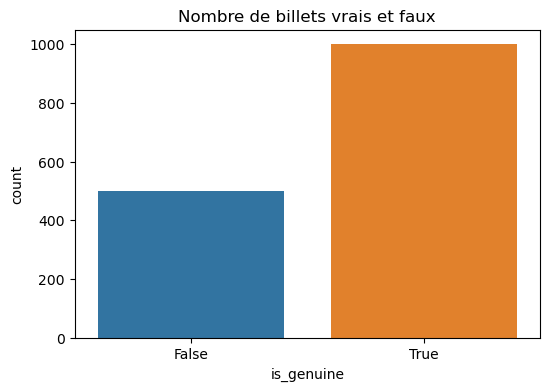

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='is_genuine')
plt.title('Nombre de billets vrais et faux')
plt.show()

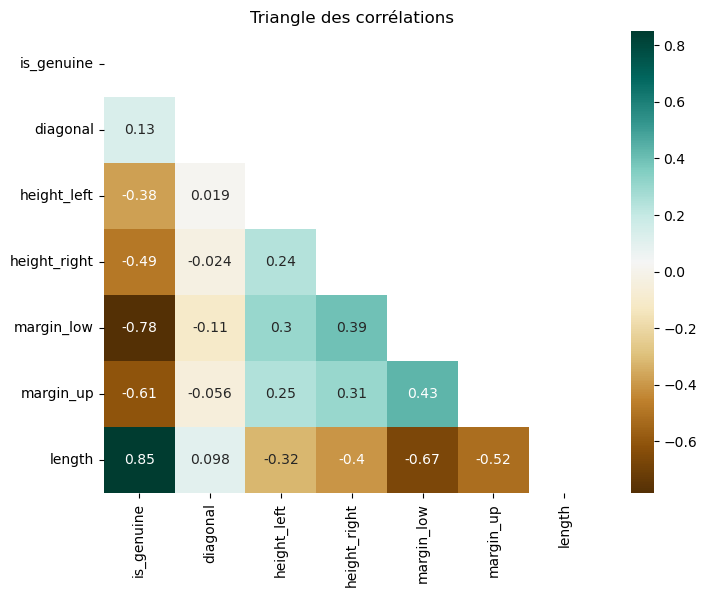

In [9]:
# Heatmap des corrélations

matrix = df.corr()
mask = np.triu(np.ones_like(matrix))
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, mask=mask, annot=True, cmap='BrBG')
plt.title('Triangle des corrélations')
plt.show()

**Les 2 variables quantitative les plus corréler sont 'length' et 'margin_low', elle sont corréler négativement !**
- 'length' est aussi assez bien corréler à 'height_right' et 'margin_up'
- 'margin_up' est assez bien corréler à 'margin_low'
---

**Liste des variables les plus corréler à 'is_genuine' dans l'odre décroissant :**
- 'length'
- 'margin_low'
- 'margin_up'
- 'height_right'
- 'height_left'
- 'diagonal'

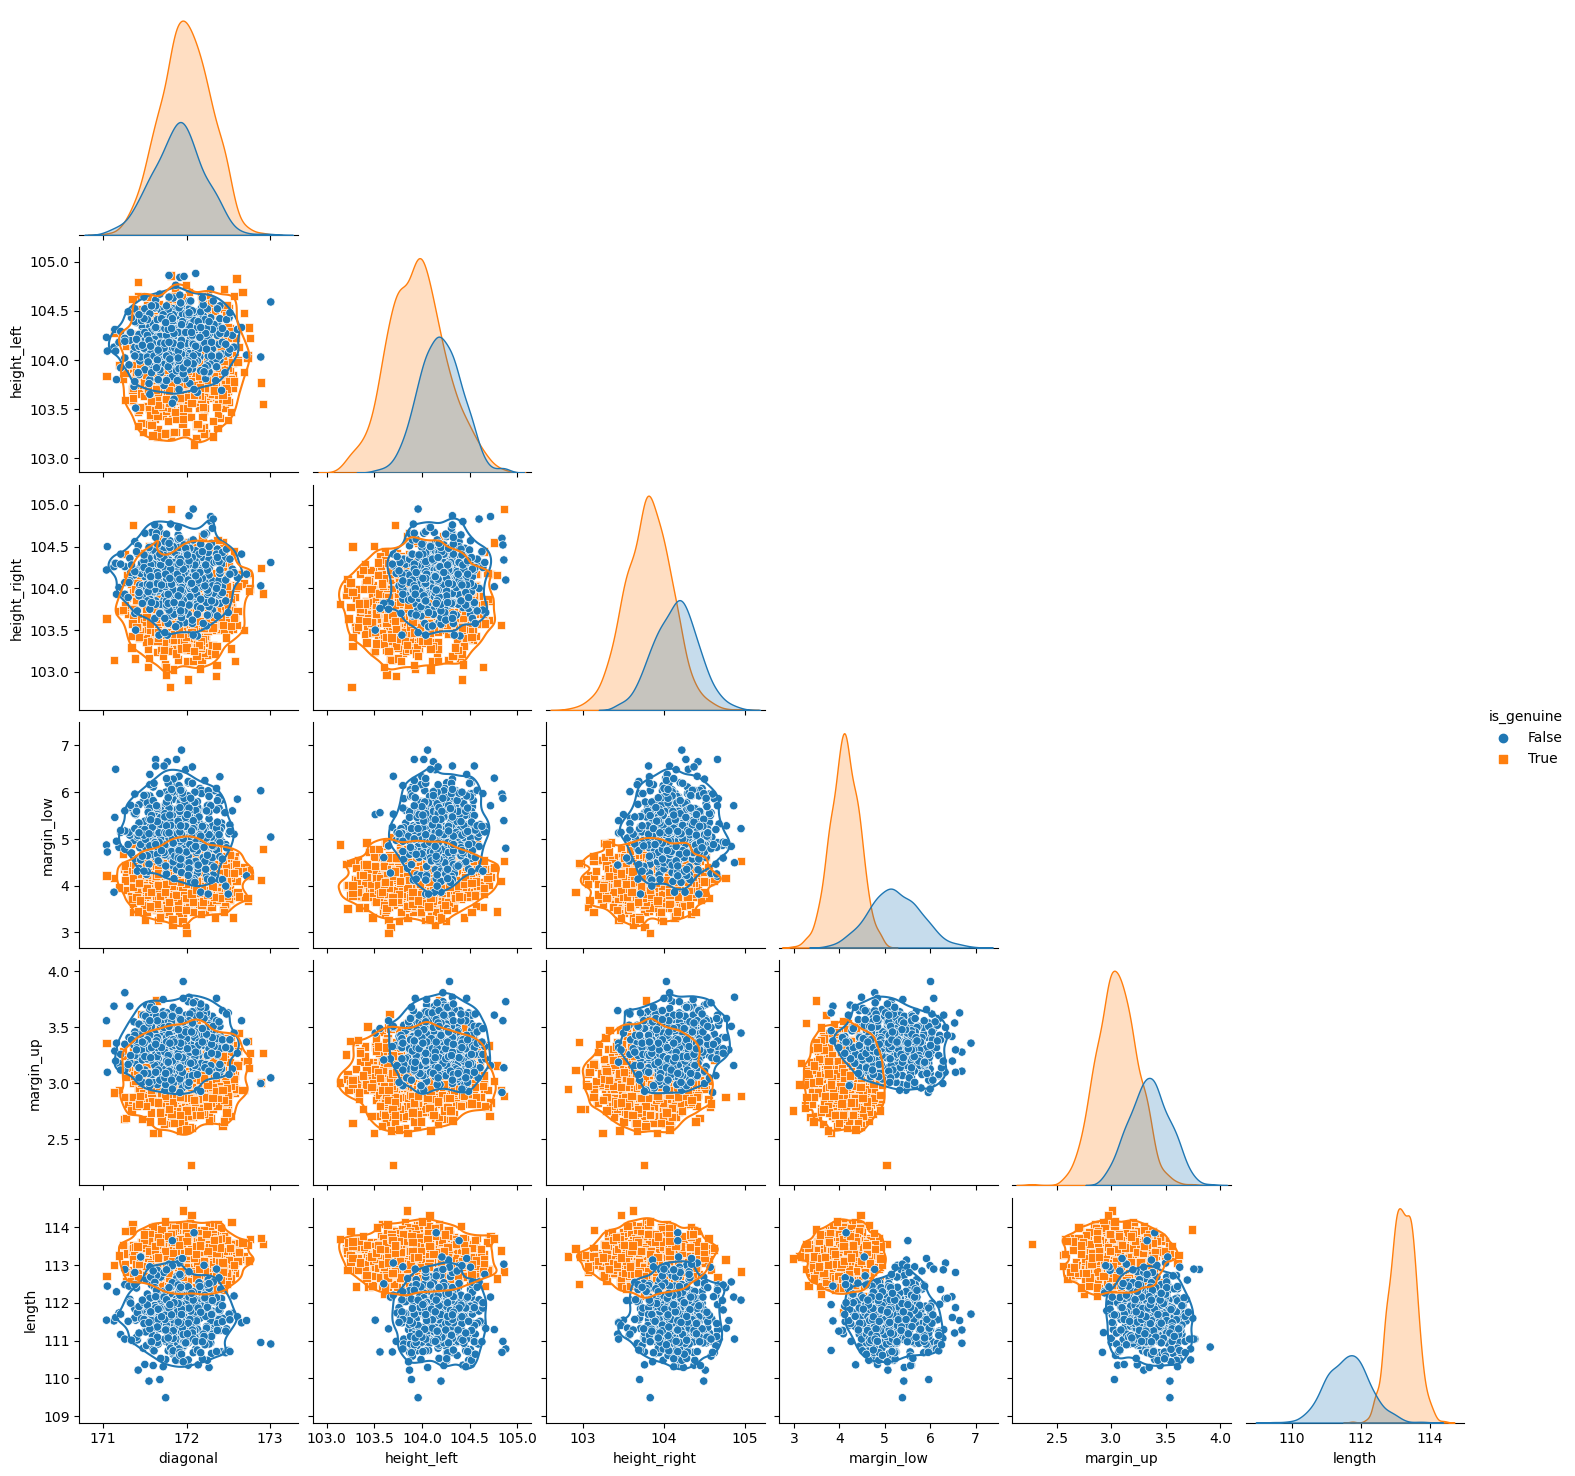

In [10]:
# Visualisation par nuage de points des différentes relations entre les variables

g = sns.pairplot(df, hue='is_genuine', markers=['o','s'], corner=True)
g.map_lower(sns.kdeplot, levels=2, color='.2')
plt.show()

**Les 2 groupes sont le plus distinct sur la ligne de la variable 'length'**

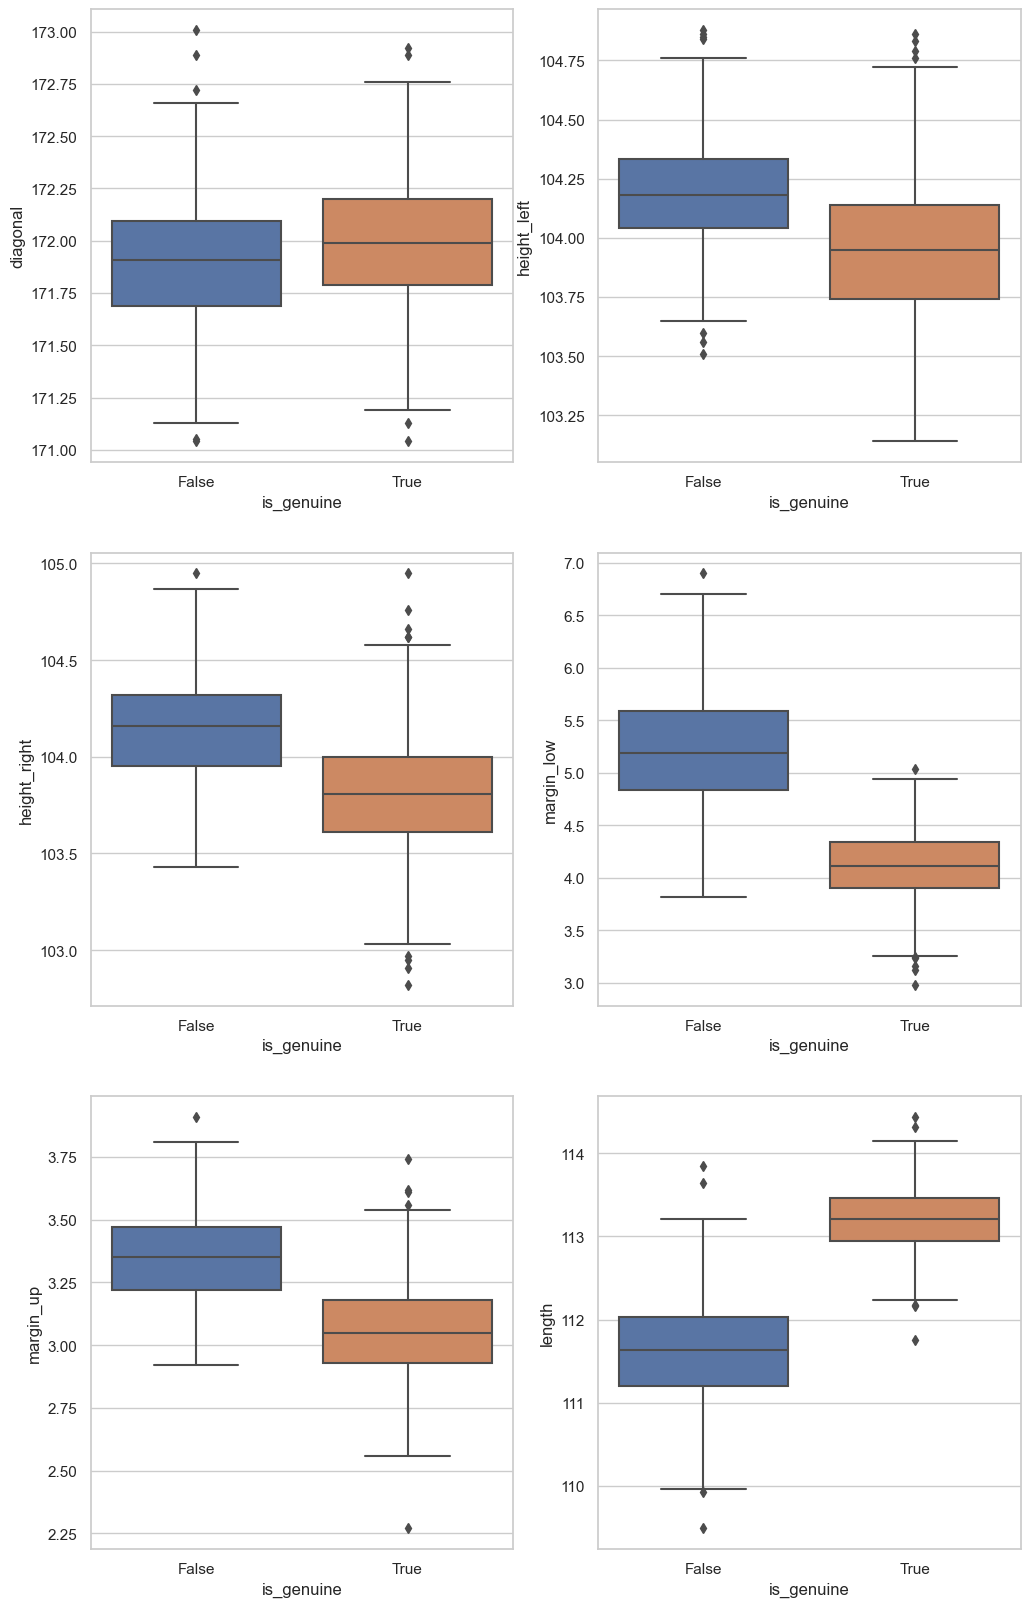

In [11]:
# Comparaison visuelle des vrai et faux billets pour chaque variables par Boxplot

plt.figure(figsize=(12, 20))
sns.set(style="whitegrid")

plt.subplot(321)
sns.boxplot(data=df, x='is_genuine', y='diagonal')

plt.subplot(322)
sns.boxplot(data=df, x='is_genuine', y='height_left')

plt.subplot(323)
sns.boxplot(data=df, x='is_genuine', y='height_right')

plt.subplot(324)
sns.boxplot(data=df, x='is_genuine', y='margin_low')

plt.subplot(325)
sns.boxplot(data=df, x='is_genuine', y='margin_up')

plt.subplot(326)
sns.boxplot(data=df, x='is_genuine', y='length')

plt.show(block=False)

**Les variables 'length' et 'margin_low' ont le plus de différence entre les vrais et les faux billets !**

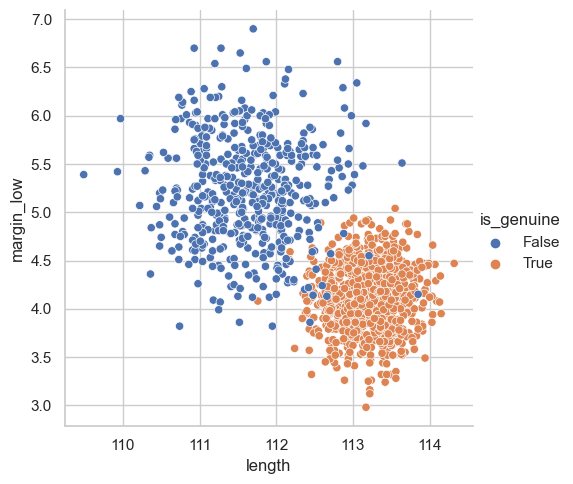

In [12]:
# Visualisation des vrais/faux billets sur 'margin_low' par rapport à 'length'

x = df['length']
y = df['margin_low']
z = df['is_genuine']

sns.relplot(x = x, y = y, hue= z)
plt.show()

# Enrichissement des données

## Régression linéaire simple

In [13]:
# Suppréssion des lignes contenant 1 valeurs manquantes
df_full = df.dropna(inplace=False)

# Variable de prédiction
X = df_full[['length']]
# Variable a prédir
y = df_full[['margin_low']]

lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [14]:
# Prédiction de y en fonction de X

y_pred = lr.predict(X)
y_pred

array([[4.40728129],
       [4.27549835],
       [4.24001833],
       ...,
       [4.85331586],
       [4.70125862],
       [4.79249296]])

In [15]:
# Coefficient de détermination R²
# y = (coef * X) + intercept

print('Constante :',lr.intercept_)
print('Coef :', lr.coef_)
print('R² :',lr.score(X,y))

Constante : [61.59600862]
Coef : [[-0.50685746]]
R² : 0.4445592708293492


## Régression linéaire multiple

Utilisation de la régression linéaire multiple pour prédire les valeurs de margin_low manquantes grace aux autres variable ! (Selon une note laisser par un collègue)

In [16]:
# Suppréssion des lignes contenant 1 valeurs manquantes
df_full = df.dropna(inplace=False)

# Variable de prédiction
#X = df_full['length'][:, np.newaxis]
X = df_full[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
# Variable a prédir
y = df_full[['margin_low']]

lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [17]:
# Prédiction de y en fonction de X

y_pred = lr.predict(X)
y_pred

array([[4.78867649],
       [4.13890773],
       [4.12593262],
       ...,
       [4.90027735],
       [4.80857449],
       [4.83903233]])

### Evaluation de la régression linéaire multiple

In [18]:
# Coefficient de détermination R²
# y = (coef * X) + intercept

print('Constante :',lr.intercept_)
print('Coef :', lr.coef_)
print('R² :',lr.score(X,y))

Constante : [22.99484271]
Coef : [[-0.11105978  0.18412242  0.25713805  0.2561879  -0.40910293]]
R² : 0.4773366973063956


Les coefficients représentent l'importance des différentes variables dans la prédiction de y. Plus le coef est grand plus la variable est significative pour prédire y !

Le R² est le coefficient de détermination, qui nous permet de savoir si notre modele est bon ou pas. Plus le coefficient de détermination est proche de 1, meilleur est notre modèle !
___

Ici notre coefficient de détermination est faible (0,47), ce qui représente un mauvais model selon cet indicateur !

In [19]:
# Erreur de la moyenne absolue
print('MAE :', metrics.mean_absolute_error(y, y_pred))
# Erreur de la moyenne absolue au carré
print('MSE :', metrics.mean_squared_error(y, y_pred))
# Erreur quadratique moyenne est la racine carrée de la moyenne de la somme des carrés des valeurs résiduelles.
print('RMSE :', np.sqrt(metrics.mean_squared_error(y, y_pred)))

MAE : 0.3722362700627655
MSE : 0.23015269769784186
RMSE : 0.4797423242719386


Le MAE ,MSE et RMSE sont des indicateur qui nous permettent d'en savoir plus sur nos résidus. Plus l'indicateur est faible, meilleur est le modèle !
___

Ici on voit que nos indicateurs sont assez faible pour nous indiquer que notre modèle est bon !

In [20]:
# Test de significativité globale

n = X.shape[0]
p = X.shape[1]

F = (lr.score(X,y) / (p - 1)) / ((1 - lr.score(X,y)) / (n - p))
p_value = 1 - stats.f.cdf(F, p - 1, n - p)

**Utilisation de la bibliothèque 'statsmodels', pour plus de précision et d'information statistique !**

In [21]:
# Ajouter une constante à X pour l'intercept de la régression

X = sm.add_constant(X)

# Créer le modèle de régression linéaire multiple

mlr = sm.OLS(y, X).fit()
#patsy.dmatrix("B + C", data=df)

In [22]:
# Prédiction de y en fonction de X

Y_pred = mlr.predict(X)
Y_pred

0       4.788676
1       4.138908
2       4.125933
3       4.156580
4       4.577425
          ...   
1495    5.191741
1496    5.456887
1497    4.900277
1498    4.808574
1499    4.839032
Length: 1463, dtype: float64

In [23]:
print(mlr.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Mon, 23 Oct 2023   Prob (F-statistic):          2.60e-202
Time:                        17:01:49   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.9948      9.656      2.382   

In [24]:
# Test de significativité individuelle
t_values = mlr.tvalues[1:]
p_values = mlr.pvalues[1:]

# Test de normalité des résidus (test de Jarque-Bera)
residuals = mlr.resid
jb_value, jb_pvalue = normal_ad(residuals)

# Test d'homoscédasticité (test de Breusch-Pagan)
bp_value, bp_pvalue, _, _ = het_breuschpagan(residuals, X)

print("Test de significativité globale : p_value =", p_value,"\n")
print("Test de significativité individuelle : t =", t_values, " p_value =", p_values,"\n")
print("Test de normalité des résidus : p_value =", jb_pvalue,"\n")
print("Test d'homoscédasticité : p_value =", bp_pvalue,"\n")

Test de significativité globale : p_value = 1.1102230246251565e-16 

Test de significativité individuelle : t = diagonal        -2.680060
height_left      4.112527
height_right     5.977983
margin_up        3.979907
length         -22.626708
dtype: float64  p_value = diagonal        7.443859e-03
height_left     4.132146e-05
height_right    2.836546e-09
margin_up       7.233463e-05
length          2.183858e-97
dtype: float64 

Test de normalité des résidus : p_value = 5.114137678797947e-12 

Test d'homoscédasticité : p_value = 7.7595352162076815e-16 



**Test de significativité globale**  
La valeur p est inférieure à 0,05 donc la régression linéaire multiple est statistiquement significative.  
  
**Test de significativité individuelle**  
Les valeurs p de toutes les variables indépendantes sont inférieure à 0,05 donc toutes les variables contribut significativement à la régression linéaire multiple.  
  
**Test de normalité des résidus**  
La valeur p est inférieure à 0,05 donc les résidus ne suivent pas une distribution normale.  
  
**Test d'homoscédasticité**  
La valeur p est inférieure à 0,05 donc la variance des résidus n'est pas constante et la régression linéaire multiple pourrait ne pas être fiable pour prédire les valeurs de la variable dépendante.

### Visualisation de la régression linéaire multiple

In [25]:
# Prédiction des valeurs 'margin_low' manquantes grâce aux autres valeurs en utilisant la régression linéaire multiple !

df_nan = df[df['margin_low'].isnull()]
t = df_nan.loc[:,['diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
y_nan = lr.predict(t).round(2)

In [26]:
# DataFrame des valeurs prédis en utilisant la régression linéaire !

df_pred = pd.DataFrame(y_nan)
df_pred.rename(columns = {0:'margin_low'}, inplace = True)

df_pred['is_genuine'] = df_nan['is_genuine'][:, np.newaxis]
df_pred['diagonal'] = df_nan['diagonal'][:, np.newaxis]
df_pred['height_left'] = df_nan['height_left'][:, np.newaxis]
df_pred['height_right'] = df_nan['height_right'][:, np.newaxis]
df_pred['margin_up'] = df_nan['margin_up'][:, np.newaxis]
df_pred['length'] = df_nan['length'][:, np.newaxis]

df_pred = df_pred.reindex(columns = ['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length'])

df_pred.head(5)

C:\Users\Ibrahim\AppData\Local\Temp\ipykernel_14392\1086525947.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_pred['is_genuine'] = df_nan['is_genuine'][:, np.newaxis]
C:\Users\Ibrahim\AppData\Local\Temp\ipykernel_14392\1086525947.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_pred['diagonal'] = df_nan['diagonal'][:, np.newaxis]
C:\Users\Ibrahim\AppData\Local\Temp\ipykernel_14392\1086525947.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_pred['height_left'] = df_nan['height_left'][:, np.newaxis]
C:\Users\Ibrahim\AppData\Local\Temp\ipykernel_14392\1086525947.

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.94,103.89,103.45,4.32,3.25,112.79
1,True,171.93,104.07,104.18,4.39,3.14,113.08
2,True,172.07,103.80,104.38,4.41,3.02,112.93
3,True,171.45,103.66,103.80,4.32,3.62,113.27
4,True,171.83,104.14,104.06,4.65,3.02,112.36


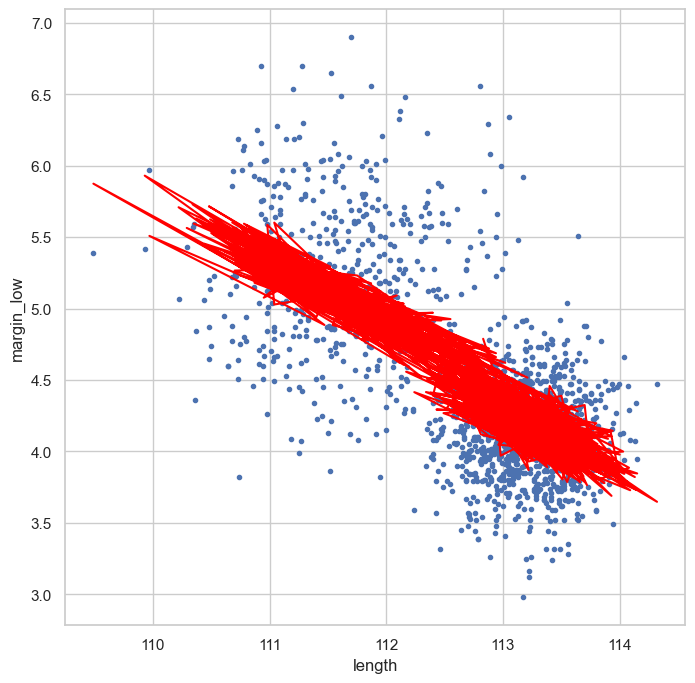

In [27]:
# Visualisation de la droite de régression linéaire

fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_xlabel("length")
ax.set_ylabel("margin_low")

_ = ax.scatter(df_full.length, df_full.margin_low, c="b", marker=".", alpha=1)
_ = ax.plot(df_full.length, y_pred, c="red")

**La régression linéaire multiple prend en compte plusieurs variables donc plusieurs dimenssions. Ici nous avons 6 variables donc 6 dimenssions ! Malheuresement on ne peut pas visualiser plus de 3 dimenssions !**

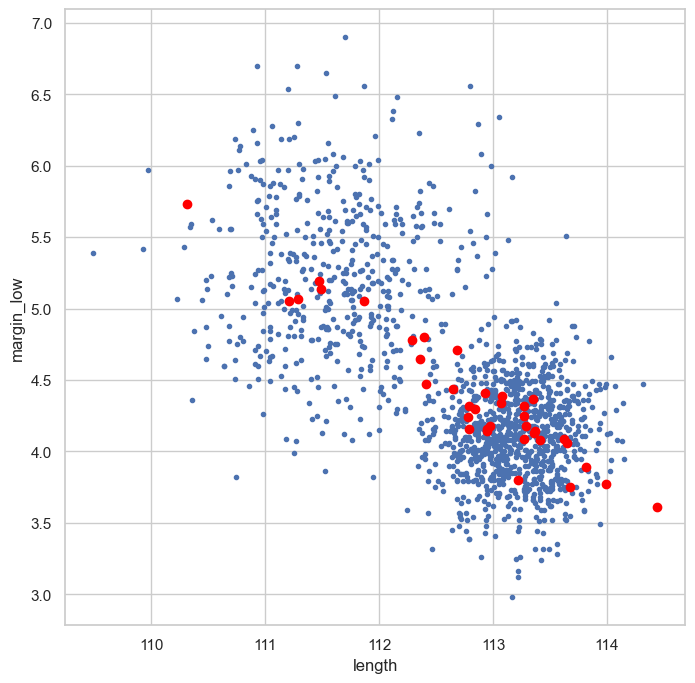

In [28]:
# Visualisation des valeurs prédis sur la droite de régression linéaire

fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_xlabel("length")
ax.set_ylabel("margin_low")

_ = ax.scatter(df_full.length, df_full.margin_low, c="b", marker=".", alpha=1)
#_ = ax.plot(df_full.length, y_pred, c="red")
_ = ax.scatter(df_pred.length, df_pred.margin_low, c="red")

Les valeurs de 'margin_low' prédites grace à la régression linéaire multiple avec nos données, comme on peut le voir sur cet exemple !

In [29]:
# Ajout des données manquantes crée grace à la prédiction

data = pd.concat([df_full, df_pred])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 36
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 83.5 KB


**Nous avons plus aucune valeur manquante !**

## Analyse en Composantes Principales

### Normalisation des données

In [30]:
# On supprime la variable qualitative
N = data.drop(['is_genuine'], axis=1)

std_scale = sk.preprocessing.StandardScaler().fit(N) # Fit des valeurs sur le modèle
data_std = pd.DataFrame(std_scale.transform(N), columns=N.columns) # Valeurs standardisées
data_std

,diagonal,height_left,height_right,margin_low,margin_up,length
0,-0.486540,2.774123,3.163240,0.055382,-1.128325,0.173651
1,-1.633729,-2.236535,-0.799668,-1.081976,-0.696799,0.471666
2,2.397823,1.504756,-1.291191,-0.126595,-0.912562,0.551901
3,-1.961498,-0.399294,0.060498,-1.309447,-0.610494,0.953075
4,-0.748754,0.836669,-1.414072,-0.672527,1.417677,-0.158750
...,...,...,...,...,...,...
1495,0.693427,1.538161,-0.492466,0.859114,-0.955715,-1.683213
1496,0.398435,0.402412,0.767063,0.449666,1.072457,-0.445303
1497,-0.781531,1.437948,0.613462,1.890319,1.978661,-2.714803
1498,2.299493,1.003691,1.504349,1.071421,1.762898,-1.385197


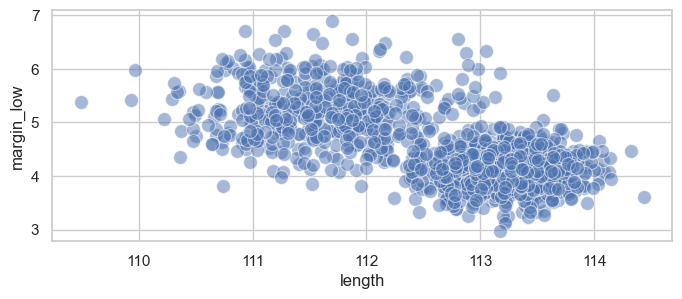

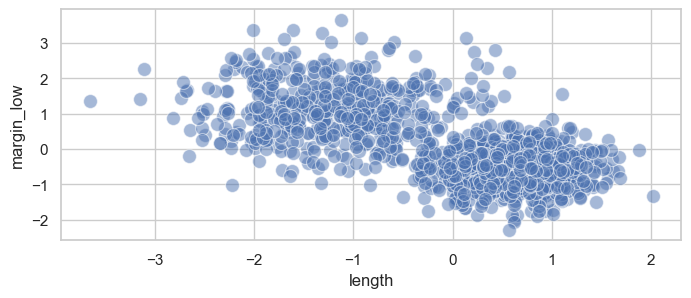

In [31]:
# Exemple avec length et de margin_low !

plt.figure(figsize=(8, 3))
sns.scatterplot(data=data, x='length', y='margin_low', s=100, alpha=.5)

plt.show()

plt.figure(figsize=(8, 3))
sns.scatterplot(data=data_std, x='length', y='margin_low', s=100, alpha=.5)

plt.show()

**Les données sont standardisée pour facilité leurs études !**

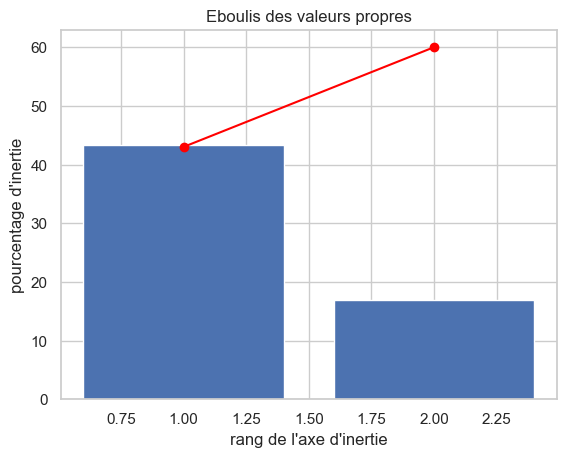

Variance expliquée : 60.2 %


In [32]:
n_components = 2
pca = PCA(n_components=n_components)
pca.fit(data_std)

#pca.explained_variance_ratio_

scree = (pca.explained_variance_ratio_*100).round(2)

scree_cum = scree.cumsum().round()

x_list = range(1, n_components+1)

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)
print(
    'Variance expliquée :', 
    round(sum(pca.explained_variance_ratio_) * 100, 1), '%')

In [33]:
features = data_std.columns

# Création du DataFrame des 2 premières composantes principales

pca = PCA(n_components=n_components)
data_acp = pca.fit_transform(data_std)
df_acp = pd.DataFrame(data_acp)
df_acp.rename(columns = {0:'PC1',1:'PC2'}, inplace = True)
df_acp['is_genuine'] = data['is_genuine'][:, np.newaxis]

df_acp.head(5)

C:\Users\Ibrahim\AppData\Local\Temp\ipykernel_14392\3467763988.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_acp['is_genuine'] = data['is_genuine'][:, np.newaxis]


,PC1,PC2,is_genuine
0,1.644104,0.747792,True
1,-2.019920,-2.207480,True
2,-0.969838,2.620523,True
3,-1.377480,-1.818400,True
4,0.148718,-0.566777,True


In [34]:
# Création du Dataframe des centroides

df_centroide = df_acp.groupby('is_genuine').mean()
df_centroide = df_centroide.reset_index()
df_centroide['is_genuine'] = df_centroide['is_genuine'].replace([True, False], 'centroide')
df_centroide

,is_genuine,PC1,PC2
0,centroide,2.035777,-0.080150
1,centroide,-1.017889,0.040075


In [35]:
# Concaténation des 2 DataFrame

df_acp = pd.concat([df_acp, df_centroide], ignore_index = True)
df_acp

,PC1,PC2,is_genuine
0,1.644104,0.747792,True
1,-2.019920,-2.207480,True
2,-0.969838,2.620523,True
3,-1.377480,-1.818400,True
4,0.148718,-0.566777,True
...,...,...,...
1497,4.043061,-0.505810,False
1498,2.777827,2.482406,False
1499,2.131126,0.059742,False
1500,2.035777,-0.080150,centroide


In [36]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('PC{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('PC{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (PC{} et PC{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

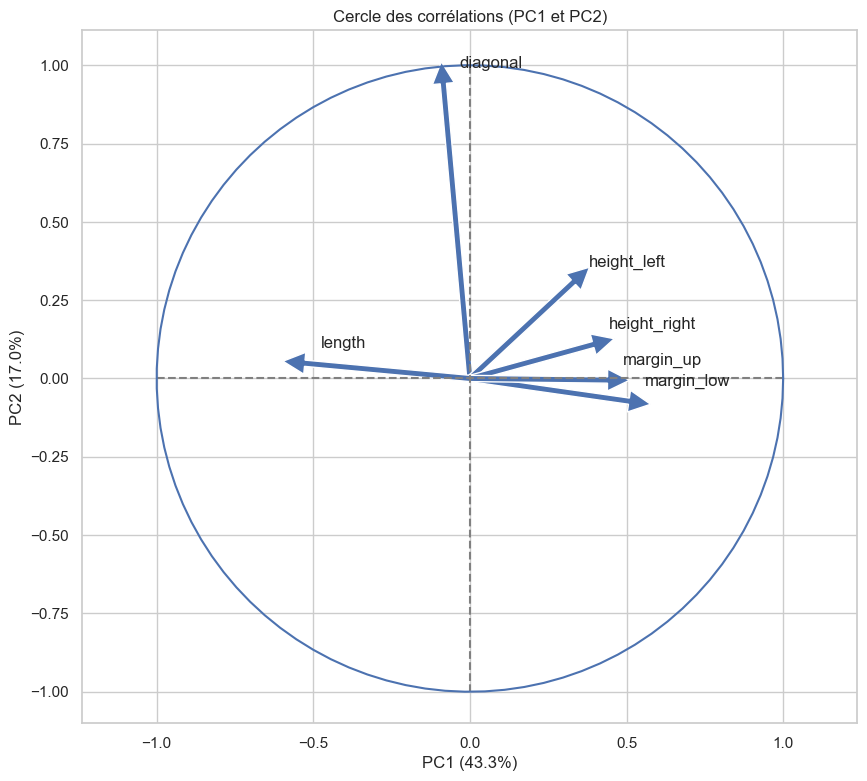

In [37]:
correlation_graph(pca, (0,1), features)

**Lecture du cercle des corrélations**

Les 2 variables les mieux représenter sont 'diagonal' et 'length', car les flèches de ces variables sont les plus grandes !
___

- L'axe des ordonnées est représenter par 'diagonal'
- L'axe des abscisses est représenter par 'length'

In [38]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, palette = 'bright')
    
    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'PC{x+1} {v1}')
    ax.set_ylabel(f'PC{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur PC{x+1} et PC{y+1})")
    plt.show()

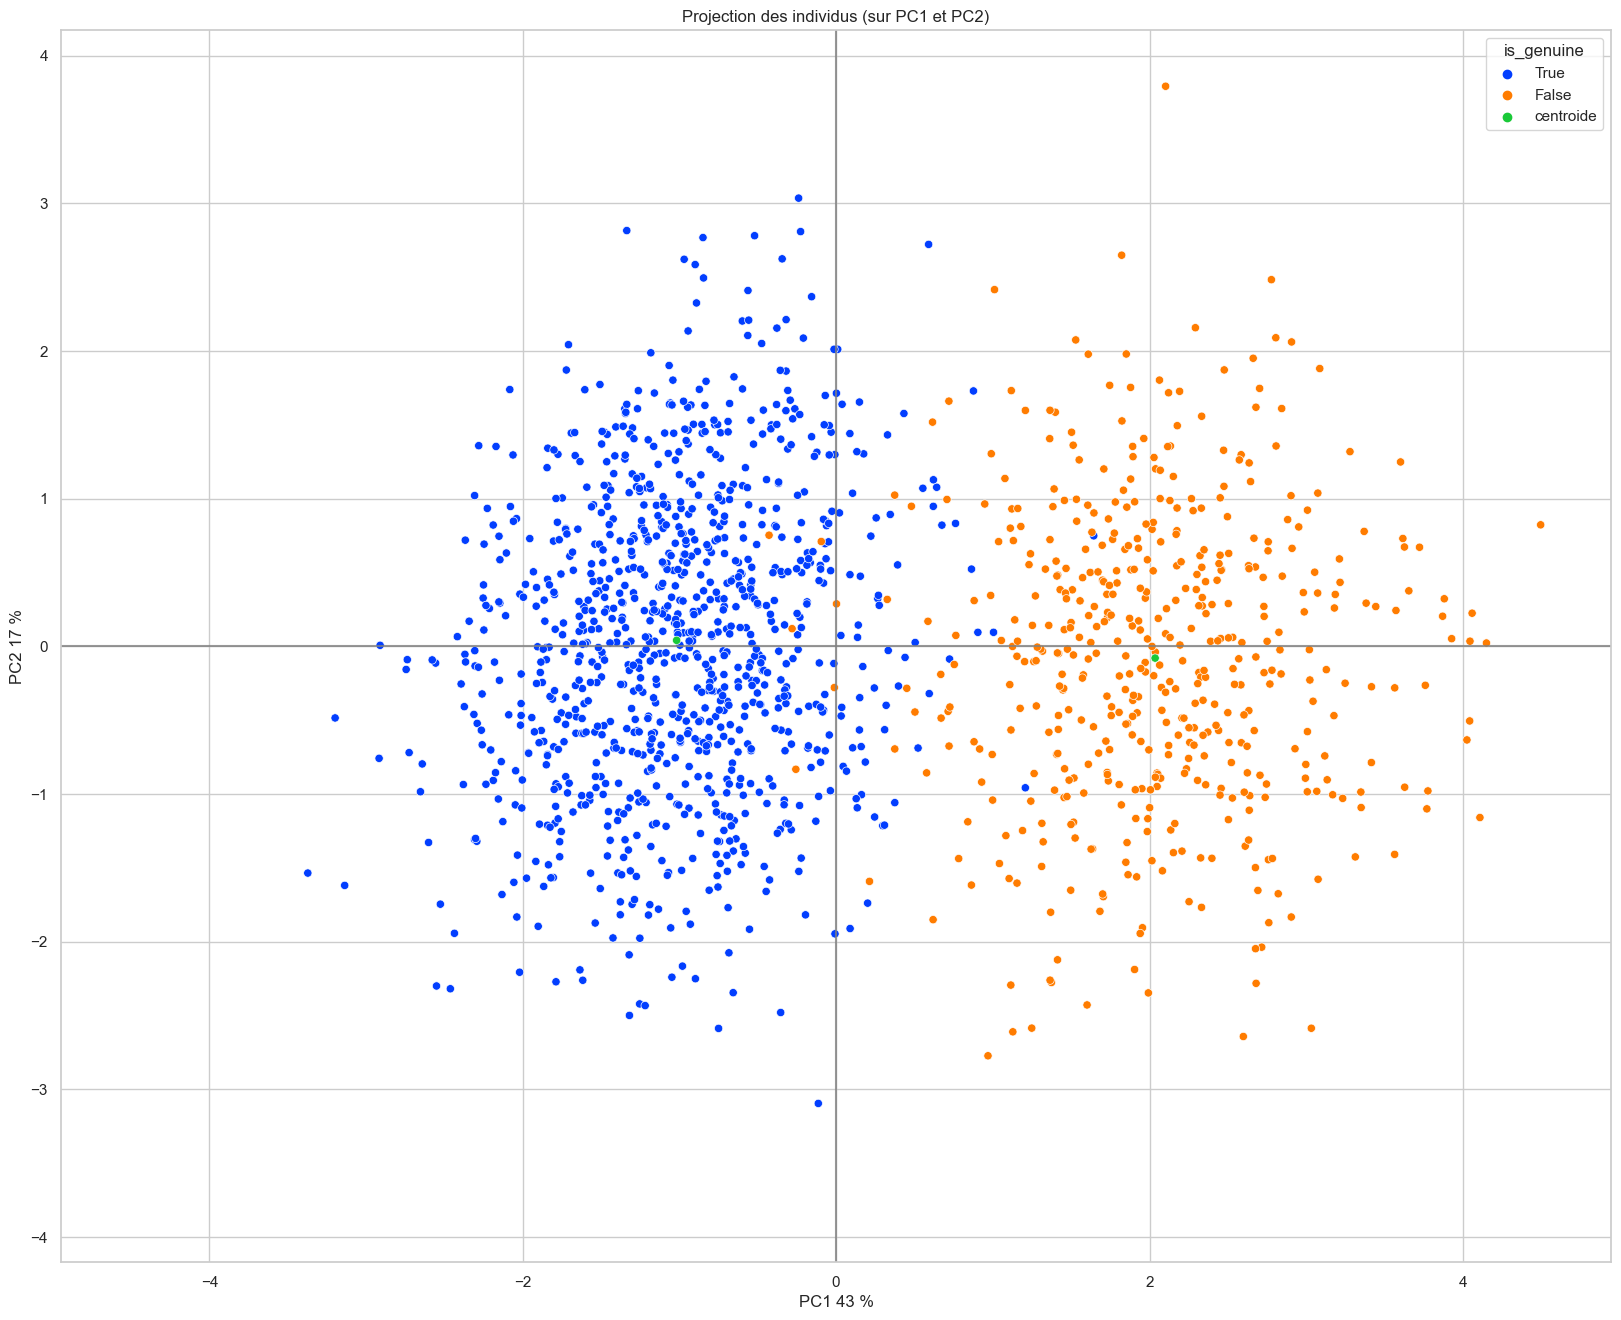

In [39]:
x_y = [0,1]
display_factorial_planes(df_acp, x_y, pca, figsize=(20,16), clusters=df_acp.is_genuine, marker="o")

On constate que l'on distingue bien nos 2 groupes (vrai billets et faux billets) sur nos 2 premières composantes !
___
- Les vrais billets ce concentrent sur le coté gauche
- Les faux billets ce concentrent sur le coté droit
- Nous voyons une zone "d'insertitude" qui est la zone de contact entre les 2 groupes
___
Les billets sont le plus différentier grace à leur longueur (length), car c'est cette variable qui est le mieu représenter sur l'axe des abscisses !

# Classification supervisée

## K-Means

On utilise 2 méthode pour trouver le nombre de cluster adapté :

- la méthode du coude
- le score silhouette


In [40]:
# On défini d'abord une liste vide pour sotcker nos inertie et score

intertia = []
sil_score = []

In [41]:
#On défini ensuite la liste du nombre de clusters que l'on veut tester
k_list = range(1, 10)

# Pour chaque valeur de k, on entraine un k-means spécifique et on stocke son inertie

for i in k_list :
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(data_std) 
  intertia.append(kmeans.inertia_)

C:\Users\Ibrahim\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [42]:
#On défini ensuite la liste du nombre de clusters que l'on veut tester
ks_list = range(2, 10)

# Pour chaque valeur de k, on entraine un k-means spécifique et on stocke son inertie

for i in ks_list :
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(data_std) 
  sil_score.append(silhouette_score(data_std,kmeans.labels_))

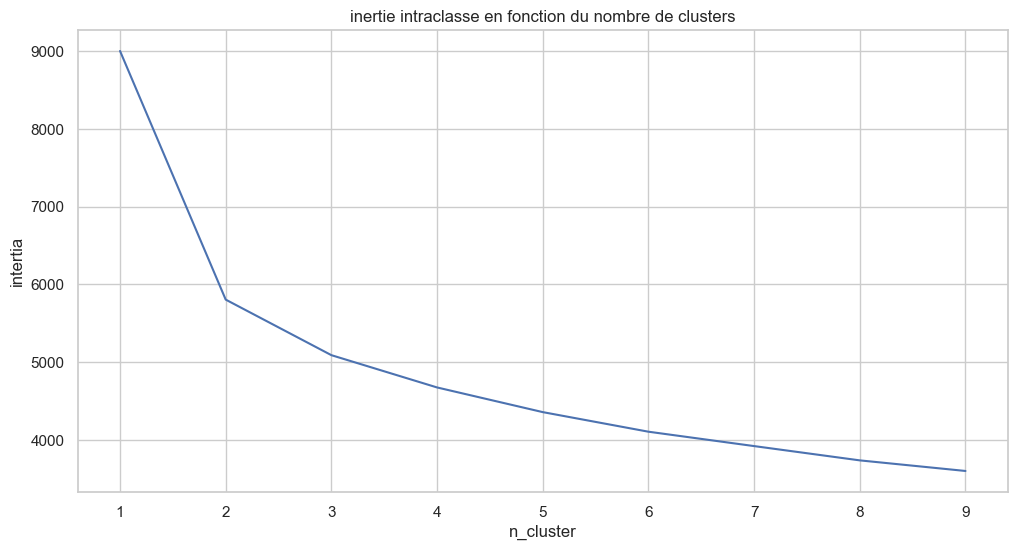

In [43]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_title("inertie intraclasse en fonction du nombre de clusters")
ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, intertia)

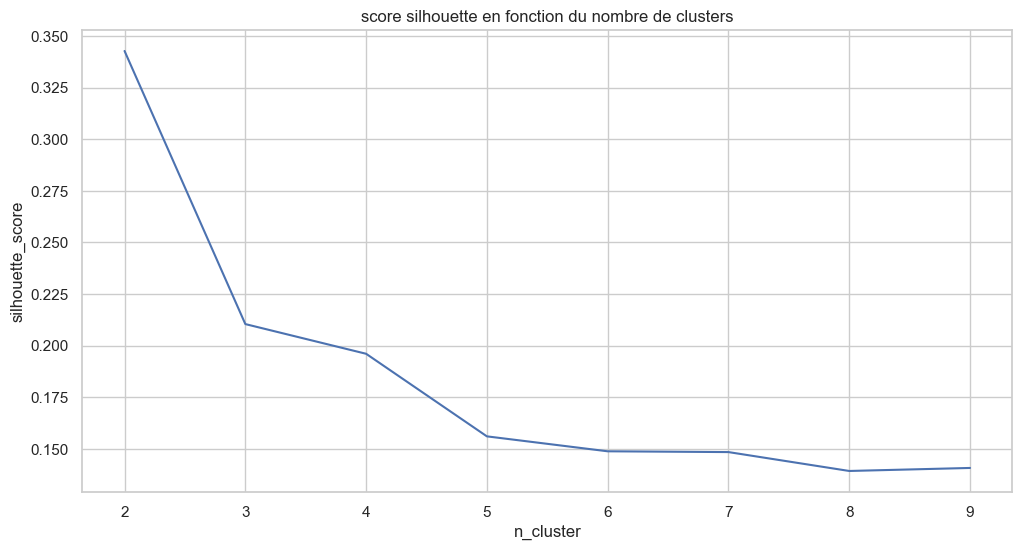

In [44]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_title("score silhouette en fonction du nombre de clusters")
ax.set_ylabel("silhouette_score")
ax.set_xlabel("n_cluster")
ax = plt.plot(ks_list, sil_score)

**Méthode du coude**

On observe sur le graphique, que la plus grosse cassure ce trouve au niveau de 2 clusters !

**Score silhouette**

On observe sur le graphique, que on obtient le plus gros score à 2 clusters !

___

On choisit donc d'utiliser le nombre de 2 cluster pour le K-Means !

In [45]:
# y est la variable à prédire !

y = data['is_genuine']
y

0      True
1      True
2      True
3      True
4      True
      ...  
32    False
33    False
34    False
35    False
36    False
Name: is_genuine, Length: 1500, dtype: bool

In [46]:
# Séparation des données d'entrainement et des données test !

X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(data_std, y, test_size=0.33)

print('X_train :', len(X_train), 'lignes',
    '\ny_train :', len(y_train), 'lignes',
    '\nX_test :', len(X_test), 'lignes',
    '\ny_test :', len(y_test), 'lignes')

X_train : 1005 lignes 
y_train : 1005 lignes 
X_test : 495 lignes 
y_test : 495 lignes


In [47]:
# On définit le cnombre de cluster à 2 et on entraine !

kmeans = sk.cluster.KMeans(n_clusters=2, random_state=0).fit(X_train, y_train)

In [48]:
# Prédictions sur l'échantillon-test

y_kmean = kmeans.predict(X_test)
y_kmean[:5]

array([1, 0, 0, 0, 0])

In [49]:
y_test = y_test.replace([False, True], [1, 2]).reset_index()
#y_test = pd.DataFrame(y_test)
y_test

,index,is_genuine
0,1090,1
1,25,2
2,227,2
3,205,2
4,19,2
...,...,...
490,461,2
491,1279,1
492,1449,1
493,1295,1


In [50]:
ytest = y_test['is_genuine']
ytest

0      1
1      2
2      2
3      2
4      2
      ..
490    2
491    1
492    1
493    1
494    1
Name: is_genuine, Length: 495, dtype: int64

In [51]:
data_acp_kmeans = pca.fit_transform(X_test)
df_acp_kmeans = pd.DataFrame(data_acp_kmeans)
df_acp_kmeans.rename(columns = {0:'PC1',1:'PC2'}, inplace = True)
df_acp_kmeans

,PC1,PC2
0,3.535974,1.616525
1,-2.369403,-0.455550
2,-1.547517,-0.983377
3,-0.689363,0.667541
4,-1.263902,1.147466
...,...,...
490,-0.996902,0.010691
491,1.902157,-1.398775
492,1.423987,-0.775236
493,2.543663,-0.468279


In [52]:
# Dataframe du K-Means

df_kmeans = df_acp_kmeans
df_kmeans['cluster'] = y_kmean
df_kmeans

,PC1,PC2,cluster
0,3.535974,1.616525,1
1,-2.369403,-0.455550,0
2,-1.547517,-0.983377,0
3,-0.689363,0.667541,0
4,-1.263902,1.147466,0
...,...,...,...
490,-0.996902,0.010691,0
491,1.902157,-1.398775,1
492,1.423987,-0.775236,1
493,2.543663,-0.468279,1


In [53]:
# Création du Dataframe des centroides

df_centroide_kmeans = df_kmeans.groupby('cluster').mean()
df_centroide_kmeans = df_centroide_kmeans.reset_index()
df_centroide_kmeans['cluster'] = df_centroide_kmeans['cluster'].replace([0, 1], 'centroide')
df_centroide_kmeans

,cluster,PC1,PC2
0,centroide,-1.062139,0.059277
1,centroide,1.942196,-0.108392


In [54]:
# Concaténation des 2 DataFrame

df_kmeans = pd.concat([df_kmeans, df_centroide_kmeans], ignore_index = True)
df_kmeans

,PC1,PC2,cluster
0,3.535974,1.616525,1
1,-2.369403,-0.455550,0
2,-1.547517,-0.983377,0
3,-0.689363,0.667541,0
4,-1.263902,1.147466,0
...,...,...,...
492,1.423987,-0.775236,1
493,2.543663,-0.468279,1
494,1.942656,0.919924,1
495,-1.062139,0.059277,centroide


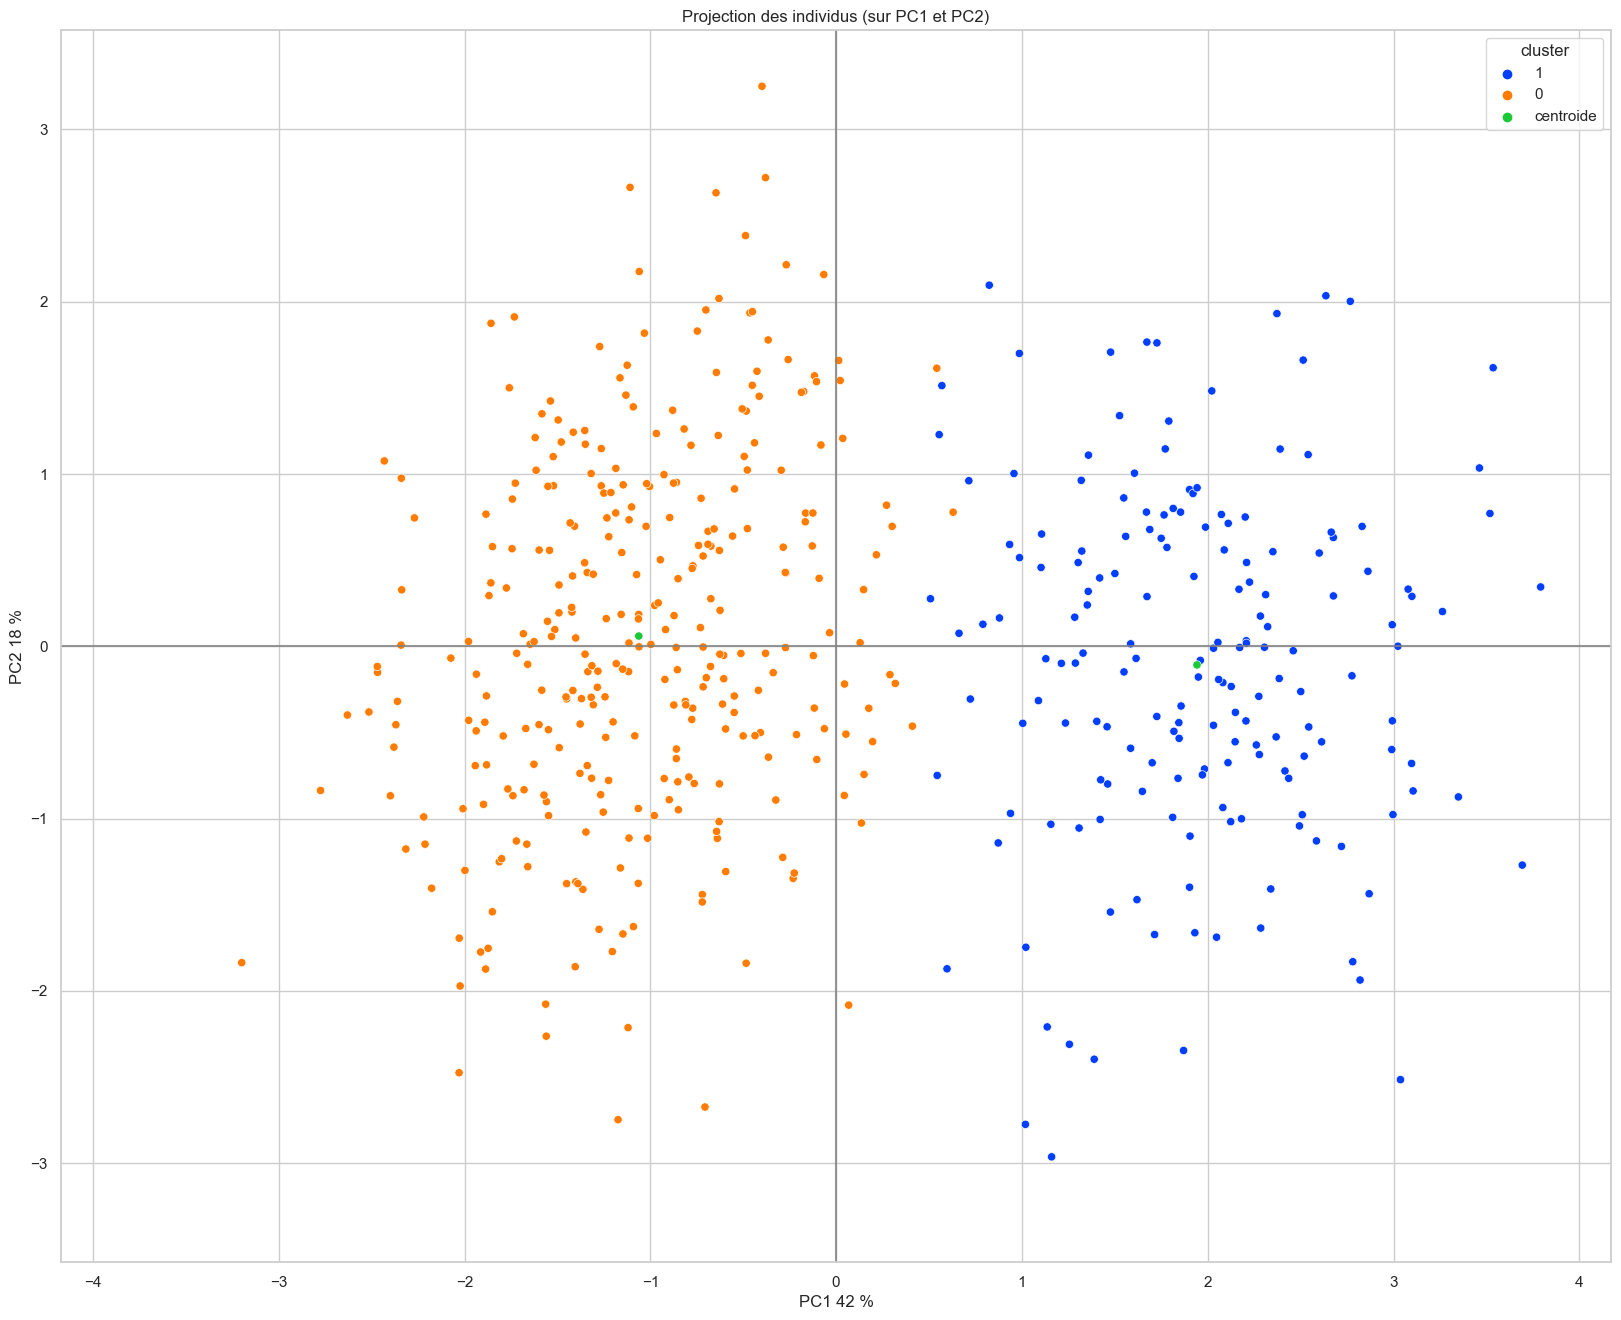

In [55]:
x_y = [0,1]
display_factorial_planes(df_kmeans, x_y, pca, figsize=(20,16), clusters=df_kmeans.cluster, marker="o")

On constate bien nos 2 groupes sur nos 2 premières composantes !
___
- Les centroides crée par le K-Means sont proche à ceux des données de base
- Les groupes sont très ressemblent à ceux des données de base
- La zone "d'insertitude" n'éxiste plus ! On voit une limite entre les 2 groupes !

In [56]:
# Suppression des centroides pour comparer les groupes de base aux groupes crée par le K-Means

df_kmeans.drop(df_kmeans.loc[df_kmeans['cluster']=='centroide'].index, inplace=True)
df_kmeans['cluster'] = df_kmeans['cluster'].replace([0], [2])
df_kmeans['is_genuine'] = ytest
df_kmeans

,PC1,PC2,cluster,is_genuine
0,3.535974,1.616525,1,1
1,-2.369403,-0.455550,2,2
2,-1.547517,-0.983377,2,2
3,-0.689363,0.667541,2,2
4,-1.263902,1.147466,2,2
...,...,...,...,...
490,-0.996902,0.010691,2,2
491,1.902157,-1.398775,1,1
492,1.423987,-0.775236,1,1
493,2.543663,-0.468279,1,1


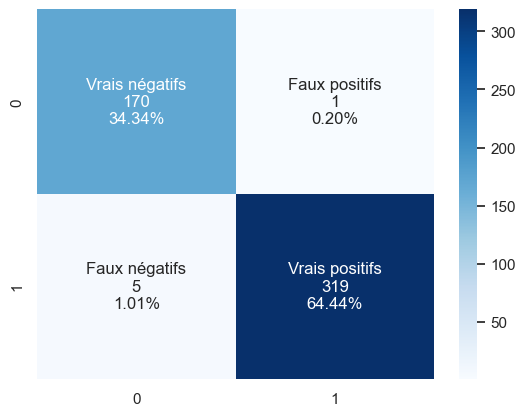

              precision    recall  f1-score   support

           1       0.97      0.99      0.98       171
           2       1.00      0.98      0.99       324

    accuracy                           0.99       495
   macro avg       0.98      0.99      0.99       495
weighted avg       0.99      0.99      0.99       495



In [57]:
def matrice_confusion(a, b, nom_graphique):
    confusion_matrix = sk.metrics.confusion_matrix(a,b)
    group_names = ['Vrais négatifs','Faux positifs','Faux négatifs','Vrais positifs']
    group_counts = ['{0:0.0f}'.format(value) for value in confusion_matrix.flatten()]
    group_percentages = [
        '{0:.2%}'.format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
              zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')
    plt.show()
    
    classification = sk.metrics.classification_report(a,b)
    print(classification)
    
matrice_confusion(df_kmeans['is_genuine'], df_kmeans['cluster'], 'kmeans_matrice-confusion')

La matrice de confusion nous permet d'évaluer les résultat du K-Means par rapport à nos données de base !
___
- 4 billets on été considérer comme vrais alors qu'ils étaient faux !
- 3 billets on été considérer comme faux alors qu'ils étaient vrais !
- 1,42% des données mal prédit !

_Accuracy_ : Cet indicateur nous indique le pourcentage de prédictions correctes que notre modèle a réalisé sur l'ensemble de données de test. Plus la précision est élevée, meilleur est notre modèle.
___
**Accuracy : 98% de prédictions correctes !**

## Regression logistique 

In [58]:
# y est la variable à prédire !

y = data['is_genuine']
y

0      True
1      True
2      True
3      True
4      True
      ...  
32    False
33    False
34    False
35    False
36    False
Name: is_genuine, Length: 1500, dtype: bool

In [59]:
# Création du Train_set et du Test_set

X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(data_std, y, test_size=0.33)

print('X_train :', len(X_train), 'lignes',
    '\ny_train :', len(y_train), 'lignes',
    '\nX_test :', len(X_test), 'lignes',
    '\ny_test :', len(y_test), 'lignes')

X_train : 1005 lignes 
y_train : 1005 lignes 
X_test : 495 lignes 
y_test : 495 lignes


- 2/3 des données pour l'entrainement
- 1/3 des données pour le test

In [60]:
regression = sk.linear_model.LogisticRegression()
regression.fit(X_train, y_train)

LogisticRegression()

In [61]:
# Coef des variables

temp_coef = pd.DataFrame(regression.coef_[0], index=X_train.columns, columns=['coef'])
print(temp_coef)

                  coef
diagonal      0.209639
height_left  -0.483012
height_right -0.844924
margin_low   -2.689520
margin_up    -1.902145
length        3.137215


Ici le coefficient nous permet de savoir quelles variables sont le plus significatives pour la prédiction des résultats !
___
- Les 3 variables les plus significatives sont "length", "margin_low" et "margin_up"
- La variable la moin significative est "diagonal"

In [62]:
# Prédictions sur l'échantillon-test

y_log = regression.predict(X_test)
y_log[:5]

array([False,  True,  True,  True, False])

In [63]:
# DataFrame avec la probabilité que le billet soit vrai ou faux

proba_result = pd.DataFrame(regression.predict_proba(X_test)).rename(columns={0: 'False', 1: 'True'})
proba_result

,False,True
0,0.999140,0.000860
1,0.000183,0.999817
2,0.000283,0.999717
3,0.000050,0.999950
4,0.999998,0.000002
...,...,...
490,0.001885,0.998115
491,0.000277,0.999723
492,0.104751,0.895249
493,0.995143,0.004857


In [64]:
# Billets avec une probabilité infèrieur à 90% d'etre Vrais ou Faux

billets_confu = proba_result.loc[(proba_result['True'] > 0.10) & (proba_result['True'] < 0.90)]
billets_confu.head(10)

,False,True
12,0.544055,0.455945
59,0.638520,0.361480
85,0.734211,0.265789
92,0.177299,0.822701
104,0.157069,0.842931
108,0.868741,0.131259
110,0.736385,0.263615
164,0.891693,0.108307
165,0.181758,0.818242
172,0.823717,0.176283


La régression logistique nous permet d'avoir pour chaque billet, la probabilité que le billet soit vrais et la probabilité que le billet soit faux !

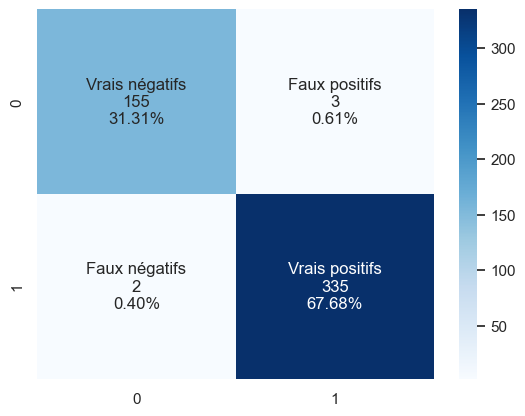

              precision    recall  f1-score   support

       False       0.99      0.98      0.98       158
        True       0.99      0.99      0.99       337

    accuracy                           0.99       495
   macro avg       0.99      0.99      0.99       495
weighted avg       0.99      0.99      0.99       495



In [65]:
matrice_confusion(y_test, y_log, 'reg_matrice-confusion')

La matrice de confusion nous permet d'évaluer les résultat de la régression logistique par rapport à nos données de base !
___
- Le nombre billets qui on été considérer comme vrais alors qu'ils étaient faux varie légèrement mais sont proche de 0 !
- Le nombre billets on été considérer comme faux alors qu'ils étaient vrais varie légèrement mais sont proche de 0 !
- Le taux de données mal prédit est proche de 1% !

_Accuracy_ : Cet indicateur nous indique le pourcentage de prédictions correctes que notre modèle a réalisé sur l'ensemble de données de test. Plus la précision est élevée, meilleur est notre modèle.
___
**Accuracy : 99% de prédictions correctes !**

C:\Users\Ibrahim\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


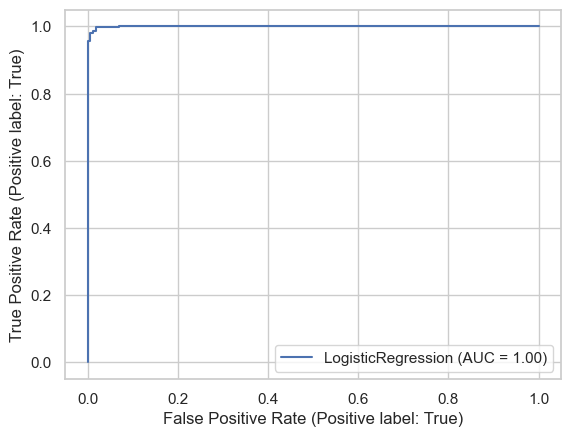

In [66]:
# Courbe ROC

plot_roc_curve(regression, X_test, y_test)
plt.show()

La courbe ROC est une représentation graphique de la performance de notre modèle en fonction de différents seuils de classification. Elle trace la sensibilité en fonction de la spécificité pour chaque seuil de classification possible.
L'aire sous la courbe ROC mesure la qualité globale de notre modèle. Plus l'AUC est proche de 1, meilleur est notre modèle.
___
Comme avec les metrics calculées plus haut, on retombe sur un modèle quasiment parfait avec une aire sous la courbe approximée à 1.

### Selection des variables

In [67]:
# Recursive Feature Elimination

sel = RFECV(estimator = regression,cv=10, scoring = 'accuracy')
sel.fit(X_train, y_train)

RFECV(cv=10, estimator=LogisticRegression(), scoring='accuracy')

In [68]:
cv_res = pd.DataFrame(sel.cv_results_)
cv_res

,mean_test_score,std_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score
0,0.957198,0.022296,0.970297,0.950495,0.980198,0.980198,0.920792,0.94,0.98,0.96,0.92,0.97
1,0.980089,0.015422,1.000000,0.980198,1.000000,0.970297,0.960396,0.96,0.99,0.99,0.96,0.99
2,0.989059,0.009357,0.990099,0.970297,1.000000,1.000000,0.980198,0.99,0.99,1.00,0.99,0.98
3,0.987069,0.009972,0.980198,0.970297,1.000000,1.000000,0.980198,0.99,0.98,1.00,0.99,0.98
4,0.985069,0.009150,0.980198,0.970297,1.000000,1.000000,0.980198,0.99,0.98,0.99,0.98,0.98
5,0.986059,0.009105,0.990099,0.970297,1.000000,1.000000,0.980198,0.99,0.98,0.99,0.98,0.98


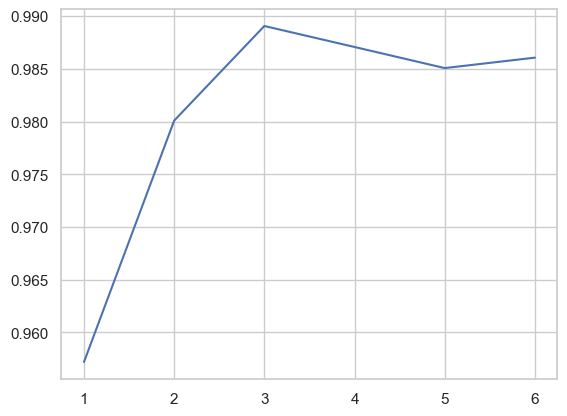

In [69]:
plt.plot(np.arange(1,7,1),cv_res['mean_test_score'])
plt.show()

In [70]:
print(sel.n_features_)

3


In [71]:
print(X_train.columns[sel.support_])

Index(['margin_low', 'margin_up', 'length'], dtype='object')


Choix du modele !!!
---

**La régression logistique est la solution qui apporte les meilleurs résultats !**

# Programme de détection des faux billets

In [72]:
# Visualisation des données du fichier

pd.read_csv('billets_production.csv')

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [73]:
# On enregistre les données d'entrainement dans un dictionnaire

data_train = {}
data_train[0] = std_scale
data_train[1] = pca
data_train[2] = regression
data_train

{0: StandardScaler(), 1: PCA(n_components=2), 2: LogisticRegression()}

In [74]:
import pickle

file = open('train', 'wb')
pickle.dump(data_train, file)
file.close()

In [75]:
# Import des librairies utiliser

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.decomposition import PCA
import pickle
import csv

# Programe de detection de faux billets

def detection_billets(fichier_csv):
    
    # Import des données d'entrainement
    file = open('train', 'rb')
    data_train = pickle.load(file)
    file.close()
    std_scale = data_train[0]
    pca = data_train[1]
    regression = data_train[2]
    
    # Import des données du fichier
    data = pd.read_csv(fichier_csv)
    X_csv = data.drop(['id'], axis=1) # On ne prend pas l'ID
    X_csv = pd.DataFrame(std_scale.transform(X_csv), columns=X_csv.columns) # Standardisation des données
    
    # Regression logistique
    y_log = regression.predict(X_csv)
    pred = pd.DataFrame(y_log)
    pred = pred.rename(columns={0: 'Prédiction'})
    pred = pred.replace({False: 'Faux billet', True: 'Vrais billet'})
    
    y_proba = regression.predict_proba(X_csv)
    proba = pd.DataFrame(y_proba)
    proba = proba.rename(columns={0: 'Probabilité de faux', 1: 'Probabilité de vrais'})
    
    # Concaténation des données
    prediction = pd.concat([pred, proba], axis = 1)
    res = pd.concat([prediction, data], axis = 1)
    
    # Recherche des billets à revérifier, car probabilité de Vrais ou Faux infèrieur à 90% !
    verif_billet = res.loc[(res['Probabilité de vrais'] > 0.10) & (res['Probabilité de vrais'] < 0.90)]
    
    # Création d'un fichier CSV avec les résultats
    res.to_csv('Resultats_Detections_Billets.csv', index = True)
    
    # Création d'un fichier CSV avec les billets à revérifier si il y en a !
    if(len(verif_billet)>0):
        verif_billet.to_csv('Billets_à_Vérifier.csv', index = True)
    
    return(res)
    

In [76]:
detection_billets('billets_test_ibrahim.csv')

,Prédiction,Probabilité de faux,Probabilité de vrais,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,Vrais billet,0.004015,0.995985,172.09,103.95,103.73,4.39,3.09,113.19,B_1
1,Faux billet,0.993952,0.006048,171.52,104.17,104.03,5.27,3.16,111.82,B_2
2,Vrais billet,0.000646,0.999354,171.78,103.80,103.75,3.81,3.24,113.39,B_3
3,Faux billet,0.999923,0.000077,172.02,104.08,103.99,5.57,3.30,111.10,B_4
4,Faux billet,0.982933,0.017067,171.79,104.34,104.37,5.00,3.07,111.87,B_5
